## Purpose
#### To gain practice plotting multivariate charts and statistical analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Covariance testing

In [3]:
np.cov(data['carat'], data['price'])

array([[2.24686660e-01, 1.74276536e+03],
       [1.74276536e+03, 1.59156294e+07]])

In [4]:
data.cov(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


## Correlation

In [5]:
np.corrcoef(data['carat'],data['price'])

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

<Axes: xlabel='carat', ylabel='price'>

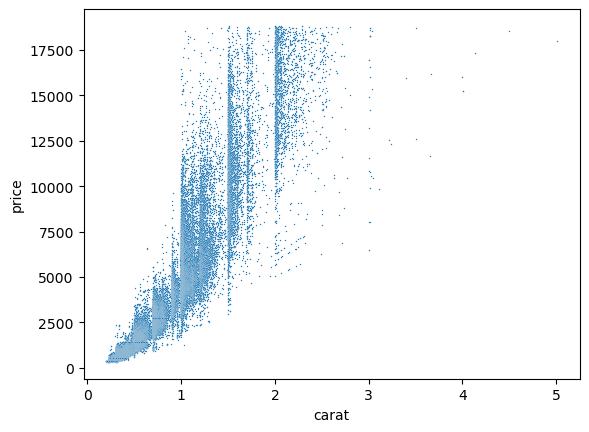

In [6]:
#scatter plot showing correlation of price and carat
sns.scatterplot(x='carat',
                y='price', 
                data=data,
                s=1
               )

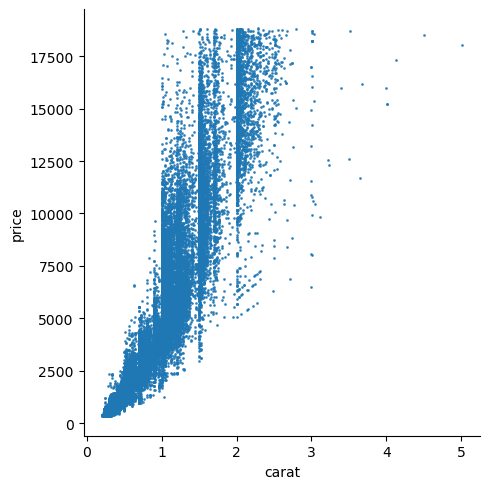

In [35]:
#another way to view
sns.lmplot(x='carat',
           y='price',
           data=data,
          scatter_kws={'s':1},
            fit_reg = False
          )

In [7]:
#creating df with numerical values
dataNumValues=data[['carat', 'price', 'table','depth']]
dataNumValues

,carat,price,table,depth
0,0.23,326,55.0,61.5
1,0.21,326,61.0,59.8
2,0.23,327,65.0,56.9
3,0.29,334,58.0,62.4
4,0.31,335,58.0,63.3
...,...,...,...,...
53935,0.72,2757,57.0,60.8
53936,0.72,2757,55.0,63.1
53937,0.70,2757,60.0,62.8
53938,0.86,2757,58.0,61.0


<Axes: >

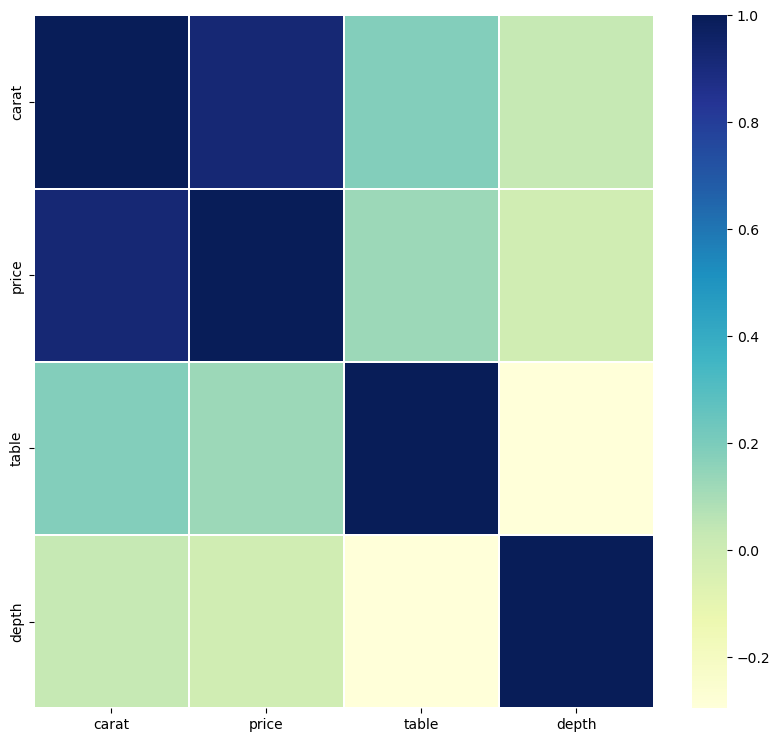

In [10]:
#Making a heat map of the numerical values excluding x,y,z(I don't know what those are)
corrmat = dataNumValues.corr()
f, ax = plt.subplots(figsize =(10,9))

sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidth=0.1)

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [14]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


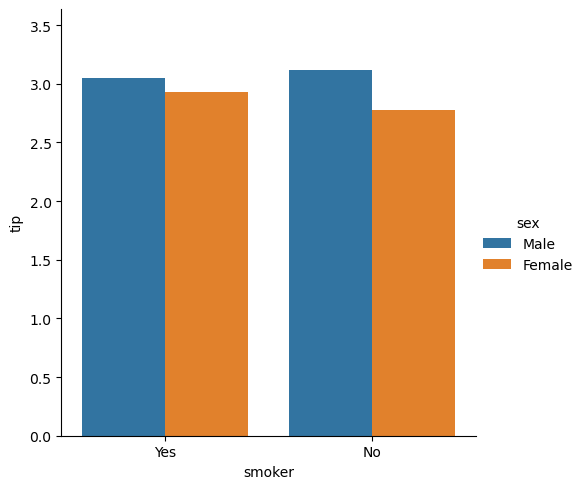

In [21]:
# I changed to the smoker dataset because the diamond one had columns with too many possibilities to graph well
sns.catplot(x='smoker', y='tip', hue='sex', data=tips, kind='bar', errwidth=0)